# MAPS

### Today we are going to use Python to make maps.  Many people use ARCgis or google maps etc.  But once you have data in python it is nice to be able to make maps right there in python.  then if you have multiple parameters you could also make lots of maps quickly!  So we are going to try and make a map. 

### We are going to try and do two mapping libraries for two reasons.  This is a new notebook so lets see how it goes.  We will do

### 1. Basemap - Publication quality maps

### 2. Folium - Interactive web mapls

You might need to install folium an basemap.  Most likely just folium.  It is "easy" to install new libraries.  How I do it, is I google "conda install folium".  

you get to this website

https://anaconda.org/ioos/folium

then you copy and paste the text into your terminal on a mac or your anaconda prompt on a PC.  And if it runs you are set!

But you probably need to install basemap also.
https://anaconda.org/anaconda/basemap


As a warning.  I find the mapping libraries a little quirkier and buggier than the other libraries. So you will need to be patient and look things up but the rewards are easy professional looking maps of your data.


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#NEW
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import folium
from IPython.display import HTML
from IPython.display import IFrame

from mpl_toolkits.basemap import Basemap

%matplotlib inline

## Make a basemap

Here is the simplest version using all defaults

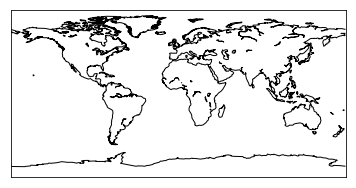

In [2]:
m = Basemap()
m.drawcoastlines()


Now you can add our fig and ax notation.

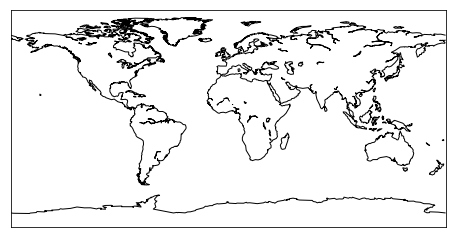

In [3]:
fig,ax=plt.subplots()
fig.set_size_inches(8,4)

m = Basemap(ax=ax)
m.drawcoastlines()

In basemap you first turn on your map with the basemap call and then you add things to it with the m. notation.   the first thing you need to do is determine your projection.  Since paper is flat and the earth is round their is no perfect projection.  Each has an error in shape or size somewhere.  Here are all the projections.  https://matplotlib.org/basemap/users/mapsetup.html

The example above is teh default which is cyl, or Cylindrical Equidistant projection, also known as Equirectangular projection or Plate Carrée. We will add it explicitly.  Once you do a projection you sometimes needs more keywords

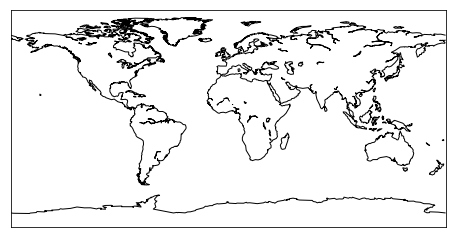

In [4]:
fig,ax=plt.subplots()
fig.set_size_inches(8,4)

m = Basemap(projection='cyl',ax=ax)
m.drawcoastlines()

Here are the keywords we can use.  Lets see some
https://matplotlib.org/basemap/api/basemap_api.html
Lets first change the center of the map by changing lon_0 to 180

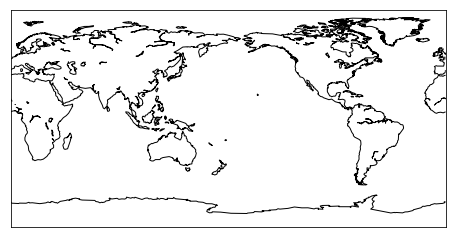

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(8,4)

m = Basemap(projection='cyl',lon_0=180,ax=ax)
m.drawcoastlines()

Now you can specify the size of the map by using corners.  and I made it course resolution. Here is the wording on resolution

	resolution of boundary database to use. Can be c (crude), l (low), i (intermediate), h (high), f (full) or None. If None, no boundary data will be read in (and class methods such as drawcoastlines will raise an if invoked). Resolution drops off by roughly 80% between datasets. Higher res datasets are much slower to draw. Default c. Coastline data is from the GSHHS (http://www.soest.hawaii.edu/wessel/gshhs/gshhs.html). State, country and river datasets from the Generic Mapping Tools (http://gmt.soest.hawaii.edu).
    
   Corners are lower left, upper right in both lat and long.  Lets try to get the us and center on it. You lose the lon_0 because you are giving a box.   
   
   Remember.  Latitute and Longitude.  Here is a picture.

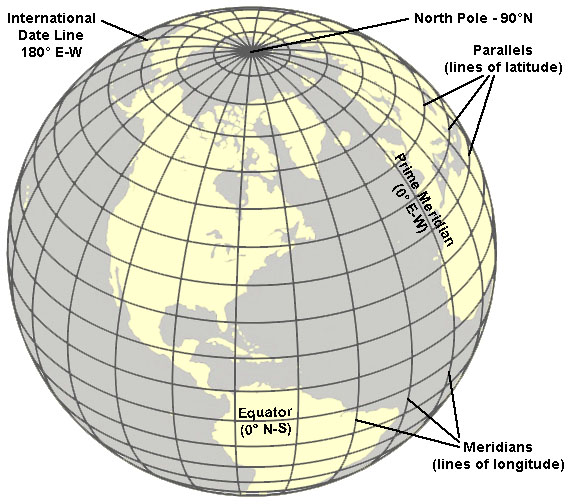

In [19]:
from IPython.display import Image
Image('globe.jpg')

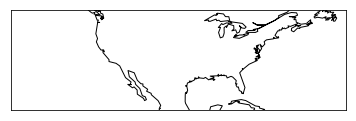

In [27]:
fig,ax=plt.subplots()
#fig.set_size_inches(8,4)

m = Basemap(projection='cyl',lon_0=90,ax=ax,\
           llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-150,urcrnrlon=-50,resolution='c')
m.drawcoastlines()

But we are missing country borders!  if you type m. and then tab you cae see what you can add! 

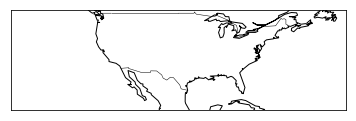

In [8]:
fig,ax=plt.subplots()

m = Basemap(projection='cyl',lon_0=90,ax=ax,\
           llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-150,urcrnrlon=-50,resolution='c')
m.drawcoastlines()
m.drawcountries()

You can also draw states in the US

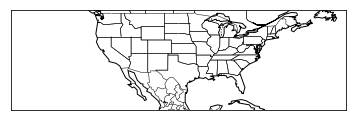

In [30]:
fig,ax=plt.subplots()

m = Basemap(projection='cyl',lon_0=90,ax=ax,\
           llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-150,urcrnrlon=-50,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

let's try a different projection!  Something like Robinson is a common one.  https://matplotlib.org/basemap/users/mapsetup.html

this projection requires a lon_0 else you will get an error

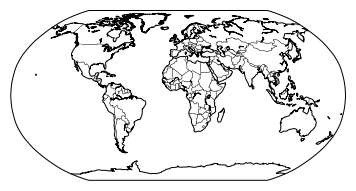

In [12]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()

### Can you choose a new projection and make it work?

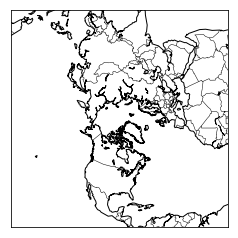

### We can make our maps look better.  
One way is to make the oceans blue and the land green.  You do this by m.fillcontinents and m.drawmapboundary with fill.  

C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


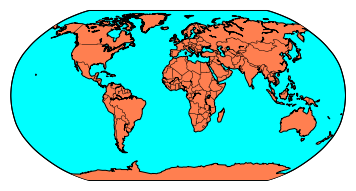

In [26]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

Next you can add you lat and lon lines.  Use drawparalls and drawmeridians.  

{-180.0: ([<matplotlib.lines.Line2D at 0x125985c0>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x12598b70>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x125a4128>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x125a46a0>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x125a4c18>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x125b11d0>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x125b1748>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x125b1cc0>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x125be278>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x125be7f0>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x125bed68>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x12a24320>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x12a24898>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x12a24e10>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x12a303c8>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x12a30940>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x12a30eb8>], []),
 160.0: ([<matplotlib.lines.Line

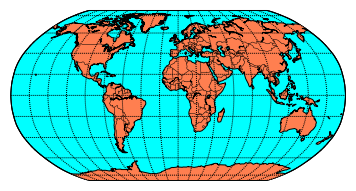

In [29]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

This is a nice looking map but they have other fills that people use.  You could use bluemarble instead. This doesn't look good zoomed in though

C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


{-180.0: ([<matplotlib.lines.Line2D at 0x1428f278>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x1428f828>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x1428fda0>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x1429c358>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x1429c8d0>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x1429ce48>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x142a9400>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x142a9978>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x142a9ef0>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x18a364a8>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x18a36a20>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x18a36f98>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x18a42550>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x18a42ac8>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x18a42f98>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x18a4e5f8>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x18a4eb70>], []),
 160.0: ([<matplotlib.lines.Line

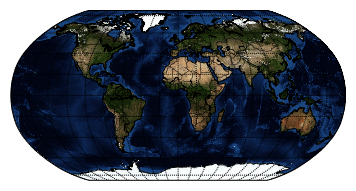

In [31]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.bluemarble()
m.drawcoastlines()
m.drawcountries()

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

You can also add maps from ESRI which does ARCGis.  https://basemaptutorial.readthedocs.io/en/latest/backgrounds.html#arcgisimage

This is very sensitive to the projection! Be careful. 

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-150.0,20.0,-50.0,50.0&bboxSR=4326&imageSR=4326&size=1500,450&dpi=96&format=png32&f=image


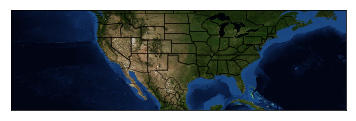

In [5]:
fig,ax=plt.subplots()

m=Basemap(projection='cyl',llcrnrlon=-150,llcrnrlat=20,urcrnrlon=-50,urcrnrlat=50)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

m.drawcountries()
m.drawstates()

### Now you should be good at making a map and turning it on with some boundaries.  

I am going to make a file of the CO2 Sampling locations and try to plot them. 

http://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations

Let's make a world map and add the points.  So read the data, and make a world map to begin

{-180.0: ([<matplotlib.lines.Line2D at 0x1649c3c8>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x1649c978>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x1649cef0>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x164a94a8>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x164a9a20>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x164a9f98>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x164b8550>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x164b8ac8>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x164b8f98>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x169de5f8>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x169deb70>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x169ee128>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x169ee6a0>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x169eec18>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x169fb1d0>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x169fb748>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x169fbcc0>], []),
 160.0: ([<matplotlib.lines.Line

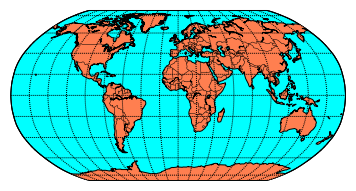

In [16]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

## Now we can add the points as scatter.  But first you have to convert the lat long to map/page coordinates.  

This is weird.  Just go with it.  You take the lat lon and you pass it into you m or basemap instance and it converts.  But remember lat long is really y,x.

/Users/bmaillou/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bmaillou/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


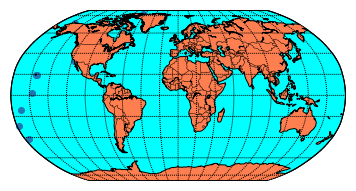

In [2]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y)

NICE!   But some Data is missing.  You need to add a zorder call to the scatter to bring it to the front.  Add zorder=10 and this brings scatter to the front.

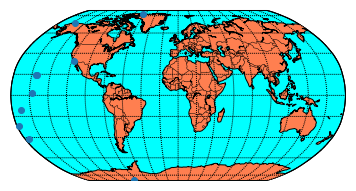

In [5]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10)

Now can you center it on the US to make it look better?

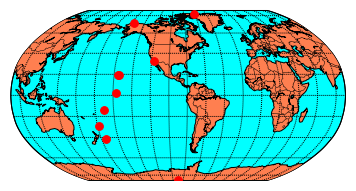

the next thing you will do is label points.  this is a bit of a pain.  But subtle and you already know all the steps!  Lets walk through it.  First do you remember adding text to your graphs with a bounding box?  We will do that. But we need to for loop through our data row by row to make it work.  You use iterrows.  https://stackoverflow.com/questions/23145928/python-and-pandas-how-to-access-a-column-using-iterrows  Let's try to learn itterows.  Lets go through it for df.

In [36]:
for index,row in df.iterrows():
    print index,row

0 StationName    Alert, NWT, Canada
StationCode                   ALT
Latitude                     82.3
Longitude                   -62.3
Elevation                     210
Dates              1985 - present
Name: 0, dtype: object
1 StationName    Point Barrow, Alaska
StationCode                     PTB
Latitude                       71.3
Longitude                    -156.6
Elevation                        11
Dates                1961 - present
Name: 1, dtype: object
2 StationName    La Jolla Pier, California
StationCode                          LJO
Latitude                            32.9
Longitude                         -117.3
Elevation                             10
Dates                     1957 - present
Name: 2, dtype: object
3 StationName    Mauna Loa Observatory, Hawaii
StationCode                              MLO
Latitude                                19.5
Longitude                             -155.6
Elevation                               3397
Dates                         19

So it goes throught the data row by row. If you just want the Latitude.... two different ways.

In [39]:
for index,row in df.iterrows():
    print row.Latitude,row['Latitude']

82.3 82.3
71.3 71.3
32.9 32.9
19.5 19.5
19.5 19.5
2.0 2.0
-14.2 -14.2
-29.2 -29.2
-41.4 -41.4
-90.0 -90.0


How about the Longitude?

-62.3
-156.6
-117.3
-155.6
-154.8
-157.3
-170.6
-177.9
-174.9
-90.0


Now how about Longitude, Latitude, and Name

In [42]:
for index,row in df.iterrows():
    print row.Latitude,row.Longitude,row.StationName

82.3 -62.3 Alert, NWT, Canada
71.3 -156.6 Point Barrow, Alaska
32.9 -117.3 La Jolla Pier, California
19.5 -155.6 Mauna Loa Observatory, Hawaii
19.5 -154.8 Cape Kumukahi, Hawaii
2.0 -157.3 Christmas Island
-14.2 -170.6 American Samoa
-29.2 -177.9 Kermadec Island
-41.4 -174.9 Baring Head, New Zealand
-90.0 -90.0 South Pole


Now Lets bring back our bounding box and our props for its properties and add one text box at -180,0

Text(8.4934e+06,8.6155e+06,u'This is crazy')

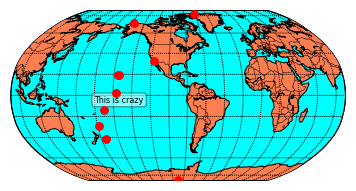

In [32]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
tx,ty=m(-180,0)
textstr='This is crazy'
ax.text(tx,ty,textstr,fontsize=8,verticalalignment='top',bbox=props)

Now put it all together.  Add your for loop and use the actual location and text like you did above

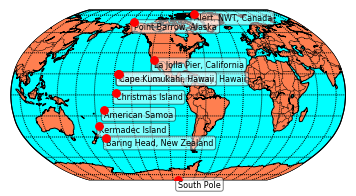

To clean mine up I changed the alpha to 0.7 or higher to make the background darker and not see through.  Then I subtracted some degress to the latitude to move the boxes over.  Then I made it a little bigger so we could see it!

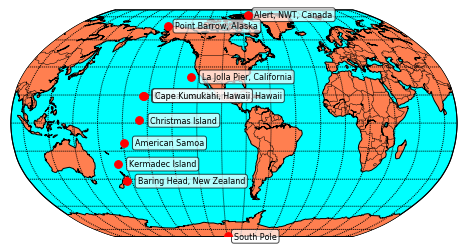

In [38]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,10)
m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values-9.0,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.7)
for index,row in df.iterrows():
    tx,ty=m(row.Longitude,row.Latitude)
    textstr=row.StationName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='center',horizontalalignment='left',bbox=props)

### You are in great shape able to put points from a file onto a map.  That is really nice.


### The next big thing you need to do is learn how to read in shape files and color in a shape file

First let's read in the blood lead data

In [41]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

In [45]:
dfBL.head()

State StateAbbrev  Population_less_than_72_months  \
0      Alabama          AL                          354230   
1      Arizona          AZ                          521310   
2   California          CA                         3037143   
3     Colorado          CO                          405720   
4  Connecticut          CT                          228774   

   NumberChildrenTested  TotalChildrenBLL  Perct10dl  
0                 21798               101   0.463345  
1                 47339                92   0.194343  
2                565397              1156   0.204458  
3                 16555                28   0.169133  
4                 68799               560   0.813965

Next I am going to just make a map of the US and use bluemarble to test it.

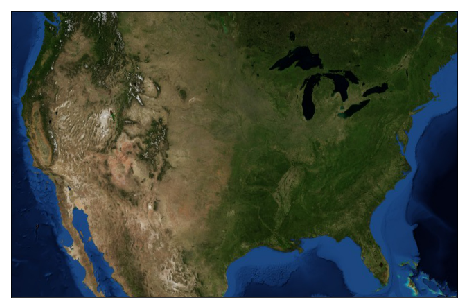

In [54]:
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)
m.bluemarble()


Now lets go and get a state shapefile

https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html

download the state shapefile

Now we can turn off bluemarble and show the shapefile.  Basemap is smart and draws the polygons for you!

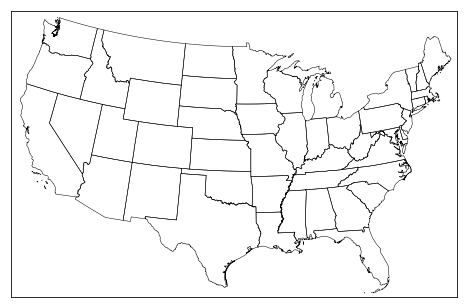

In [58]:
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

Can you download the congressional districts and map them? You have to figure out what the polygons are called!  They are called "District"

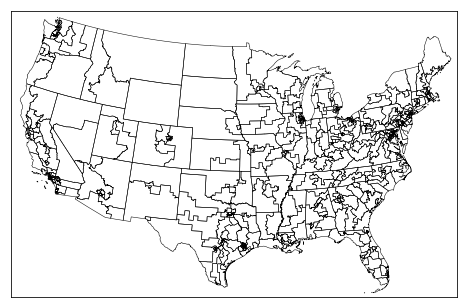

BUT what we want to do is color each state by its lead value!  So lets go back to the states.   We can loop through shp_info for each state and we can link it to the lead data we have.  So what we want to do is for each state plot the blood lead.  We will print the name and the lead.  For this you read your shape files.  Then the second name is what you call the state_info.  We just called it states and therefore you loop over states_info. Then you tell it to make a polygon using states.   

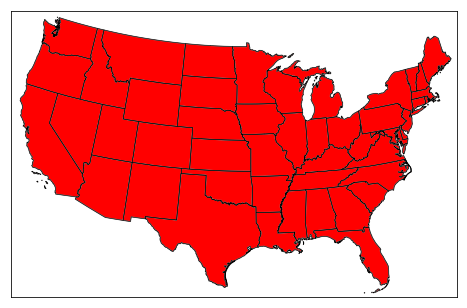

In [91]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    seg = m.states[count]
    poly = Polygon(seg, facecolor='red',edgecolor='gray')
    ax.add_patch(poly)

Now changes the states to dummy so you can see the critical parts.

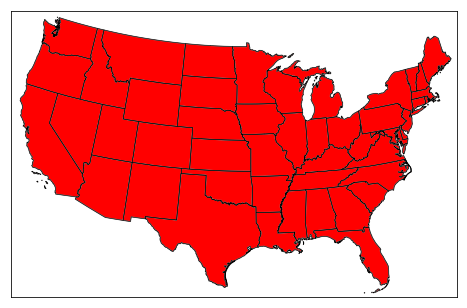

In [90]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','dummy',drawbounds=True)

for count,shape_dict in enumerate(m.dummy_info):
    seg = m.dummy[count]
    poly = Polygon(seg, facecolor='red',edgecolor='gray')
    ax.add_patch(poly)

Now set the color and if the state is New York make is a cool color.  The shape_sict['NAME'] gives you access to each state name.  So you can print them to see the names. And then set New york. I commented out the print but you can uncomment it to see what happens. 

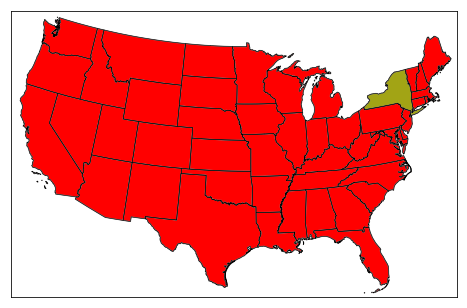

In [93]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','dummy',drawbounds=True)

for count,shape_dict in enumerate(m.dummy_info):
    # print shape_dict['NAME']
    if shape_dict['NAME']=='New York':
        color='xkcd:vomit'
    else:
        color='red'
    seg = m.dummy[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)
    

Can you set another state to another color?

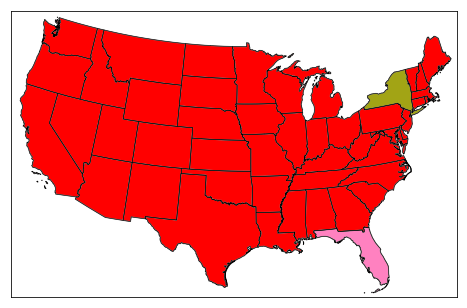

NOW Lets print the state name and the lead values.  But I am going to do a trick first and make sure we have data before we plot it by checking if the name is in our data.  You need to use .value to make it work


Alabama 0    0.463345
Name: Perct10dl, dtype: float64
Alabama 0    0.463345
Name: Perct10dl, dtype: float64
Alabama 0    0.463345
Name: Perct10dl, dtype: float64
Alabama 0    0.463345
Name: Perct10dl, dtype: float64
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data


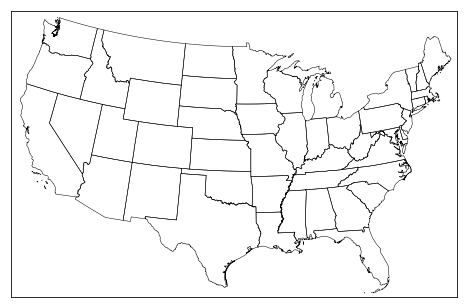

In [122]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
    #if dfBL.Perct10dl[dfBL.State==shape_dict['NAME']].isnull()==False:
        print shape_dict['NAME'],dfBL.Perct10dl[dfBL.State==shape_dict['NAME']]
    else:
        print 'No data'

Now make the states with no data gray and the states with data red.  

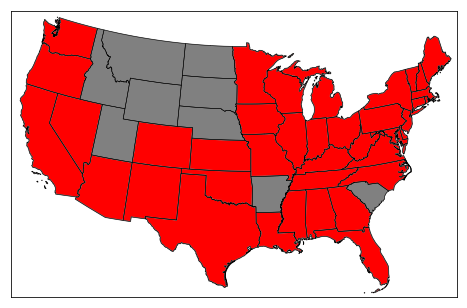

In [152]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    color='blue'
    if shape_dict['NAME'] in dfBL.State.values:
        color='red'
    else:
        color='gray'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

We are getting closer but now it gets a little weird.  We need to choose a color based on a value. if youy pass a value between 0 and 1 to a color map it passes back the rgb values. Remember there are a ton of color maps. https://matplotlib.org/examples/color/colormaps_reference.html  

This page sort of gives us the answer https://stackoverflow.com/questions/28144142/how-can-i-generate-a-colormap-array-from-a-simple-array-in-matplotlib


In [135]:
cmap=plt.cm.RdYlBu
print cmap(2)

(0.66243752402921952, 0.014763552479815456, 0.1493271818531334, 1.0)
1


But you need to use hex colors so we need to convert rgb2hex to get a color to use.

In [183]:
print rgb2hex(cmap(0.2))

#f46d43


This means if we can convert our data to a numbner between 0 and 1 we could color it and plot it.  There is a classic way to scale your data.

(Value-Min)/(max-min)

You can either find or set the min and max.  I set them as sometimes you want to scale and scrunch the end colors.

For our lead I will set the vmin and vamx to 0.1 and 0.8 because of outliers.  Since we are using pandas we can make a new column of all the scaled values.


In [158]:
vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
dfBL.head()

State StateAbbrev  Population_less_than_72_months  \
0      Alabama          AL                          354230   
1      Arizona          AZ                          521310   
2   California          CA                         3037143   
3     Colorado          CO                          405720   
4  Connecticut          CT                          228774   

   NumberChildrenTested  TotalChildrenBLL  Perct10dl  PbScaled  
0                 21798               101   0.463345  0.519065  
1                 47339                92   0.194343  0.134776  
2                565397              1156   0.204458  0.149226  
3                 16555                28   0.169133  0.098762  
4                 68799               560   0.813965  1.019950

Now we can put our data together.  We can read it in.  And make a new column scaling it.  

In [184]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
print dfBL.PbScaled[dfBL.State=='New York']

26    1.162127
Name: PbScaled, dtype: float64


Now there is a quirk.  If we pass the scaled New york value to cmap and then pass it to rgb2hex we get an error.  You will get an error and it might not match mine!!! ERROR WARNING!

In [187]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)

rgb2hex(cmap(dfBL.PbScaled[dfBL.State=='New York']))


ValueError: Invalid RGBA argument: array([[ 0.19215686,  0.21176471,  0.58431373,  1.        ]])

The trouble is we are passing an array from pandas to rgb2hex which just wants three values and not an array.  Every once in a while a function can't handle an array.  See above how it says array in the error.  So you need to send it one item.  You can do this with item or with []  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.item.html and set it equal to color.

In [189]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)

color = rgb2hex(cmap(dfBL.PbScaled[dfBL.State=='New York'].item()))

print color

#313695


Now you should be able to put it all together!   Where we have New York substitute shape_dict['NAME'] and put all the parts together!

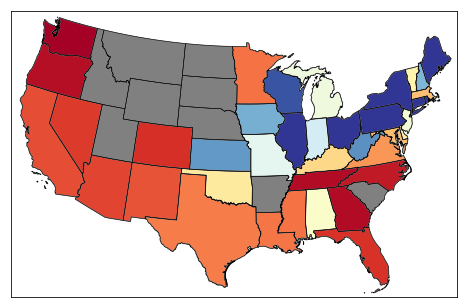

Two problems.

1. It is ugly
1. It needs a legend

First for the legend.  I learned it from here. 
https://stackoverflow.com/questions/43646097/add-colorbar-for-polygones-in-basemap-plot-of-us

It is a fourstep process
1.  use normalize to scale the colors from minimum to maximum values.  It is saying what the range is.
1.  setting the location with fig.add_axes.  You https://stackoverflow.com/questions/43326680/differences-between-add-axes-and-add-subplot  set the x,y, width and height.  
1.  pass the information to the ColorBase
1.  Give it a title
1.  ax.axis('off') just turns off the box.  See if you like it on or off.

(0.0, 4777416.5450362042, 0.0, 3067664.0158503051)

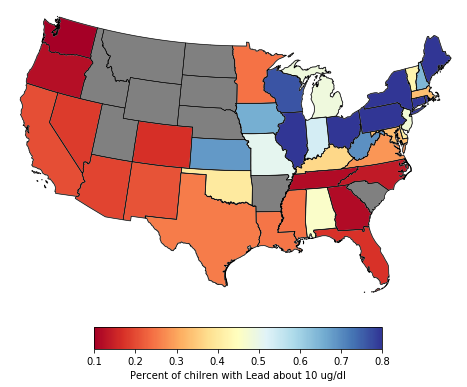

In [203]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
        color=rgb2hex(cmap(dfBL.PbScaled[dfBL.State==shape_dict['NAME']].item()))
    else:
        color='gray'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

cbar_title='Percent of chilren with Lead about 10 ug/dl'
norm = Normalize(vmin=vmin, vmax=vmax)
cax = fig.add_axes([0.27, 0.05, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel(cbar_title)   
ax.axis('off')

Now Lets choose a better color system.  I like one color for maps.  https://matplotlib.org/examples/color/colormaps_reference.html Like Blues.

Then I added hatches for the states with no data and made the color a lightgray.

Then I fixed the typos in the color bar title!

And it looks professional!

(0.0, 4777416.5450362042, 0.0, 3067664.0158503051)

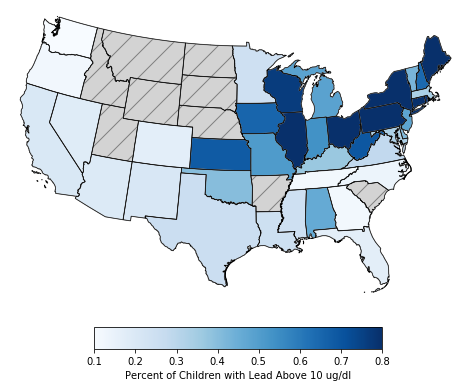

## You just made a professional looking map!!!

Now it is easy to change the map and make more data.  If you find state level data you should be set.  You can import and plot and be set.  It looks great.




## Folium
Now are are going to move on to folium and do very similar stuff but folium is for interactive mapping where you can place the map into a website or mail it to a friend.  Again, remember mapping is buggy.  But we will take our time and work through it.  
Here are some good sites for an overview
http://comet.lehman.cuny.edu/owen/teaching/datasci/choroplethLab.html

https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb

USE LOCAL PATHS!


The first basic parts are 
1.  A location
1.  Then you make a folium map
1.  Then you display the map.

In [252]:
location =[40.8106,-73.9630]
m = folium.Map(location=location)
m

But Lets try to add an icon to the map.  It is called a marker.  you add by using folium.Marker.  I also added zoom_start to say how big the map is

In [253]:
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=16)
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m

Amazing.  We put a point on our classroom and if you click the point it has a message!  I want to make the maps smaller.  The best way I did this was I save the map as an html file and then open the file with iframe.

In [257]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=16)
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

Let's look at some things we can change.  We will go back to zoom_start=6 and try a few things.  

First we can change what the map looks like!  

https://deparkes.co.uk/2016/06/10/folium-map-tiles/

Here are some example tiles.  

If we do help(folium.Map) we will learn a lot more.

In [266]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(folium.map.LegacyMap)
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "MapQuest Open"
 |      - "MapQuest Open Aerial"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Mapbox" (Must pass API key)
 |      - "CartoDB" (positron and dark_matter)
 |  
 |  You can pass a custom tileset to Folium by passing a Leaflet-style
 |  URL to the tiles parameter:
 |  http://{s}.yourtiles.com/{z}/{x}/{y}.png
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list, default None
 |      Latitude and Longitu

So lets see what happens if we add the keywork tile='StamenTerrain'

In [269]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=6,tiles='StamenTerrain')
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

Try a terrain of your choice

You can change the icon and add symbols to it.  The quickstart http://folium.readthedocs.io/en/latest/quickstart.html and the help will give you more information.  

In [275]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
icon=folium.Icon(color='red',icon='info-sign',icon_color='blue')
m = folium.Map(location=location,zoom_start=6,tiles='StamenTerrain')
folium.Marker(location,popup='Wow This is our Room!',icon=icon).add_to(m)
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

I want to make circular markers.  Because I think they look better on a map.  so lets look at the help

In [276]:
help(folium.CircleMarker)

Help on class CircleMarker in module folium.features:

class CircleMarker(folium.map.Marker)
 |  Creates a CircleMarker object for plotting on a Map.
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list, default None
 |      Latitude and Longitude of Marker (Northing, Easting)
 |  radius: int
 |      The radius of the circle in pixels.
 |  color: str, default 'black'
 |      The color of the marker's edge in a HTML-compatible format.
 |  fill_color: str, default 'black'
 |      The fill color of the marker in a HTML-compatible format.
 |  fill_opacity: float, default à.6
 |      The fill opacity of the marker, between 0. and 1.
 |  popup: string or folium.Popup, default None
 |      Input text or visualization for object.
 |  
 |  Method resolution order:
 |      CircleMarker
 |      folium.map.Marker
 |      folium.element.MacroElement
 |      folium.element.Element
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, location, radius=500, color=

It looks like we need to pass
1.  location
1.  radius
1.  fill_color
1.  color
1.  fill_opacity
1.  popup

Lets try changing our icon to a circle

In [278]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=10,tiles='StamenToner')
folium.CircleMarker(location,radius=1000,popup='Wow This is our Room!',color='red',fill_color='red').add_to(m)
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

Can you guess what I am going to have us do??????

You know it is coming!

We will read in a file of locations and we are going to plot them!  

For this we will use the lead that we sampled in Brooklyn this past summer!  Look at this blog entry. http://blogs.ei.columbia.edu/2017/10/09/many-backyards-in-brooklyn-neighborhood-are-contaminated-with-high-levels-of-lead/

Do you remember the brooklyn public lead excel sheet? Lets load it! I updated the column names to make it easier

In [260]:
df=pd.read_excel('BrooklynPublicLead.xlsx')

In [262]:
df.head()

SampleNum sample_id      SubmissionDate   Latitude  Longitude  \
0        265  17BP9001 2017-06-21 22:56:00  40.716585 -73.955596   
1        266  17BP9002 2017-06-21 18:05:00  40.716212 -73.954560   
2        267  17BP9003 2017-06-21 18:05:00  40.716245 -73.954234   
3        268  17BP9004 2017-06-21 18:05:00  40.716487 -73.954213   
4        269  17BP9005 2017-06-21 18:05:00  40.716542 -73.955192   

   sample_gps.Altitude                                     descrip_other  \
0           -19.970294                                               NaN   
1           -67.265589  Near active construction site/ might be a school   
2           -28.343367                                               NaN   
3            -4.880463                                      Near garage    
4           -16.867952                                               NaN   

            Pb  
0   122.333333  
1    85.666667  
2    94.000000  
3    46.333333  
4  1414.333333

Use folium is sometimes easier!  One way is you just pass your latitude and longitude to the location which you pass to the map.  You don't have to worry about reversing them.  Can you use your iterrows to pass all the brooklyn lead locations and plot them on the map. 

In [287]:
df=pd.read_excel('BrooklynPublicLead.xlsx')
mapName='brooklynLocations.html'
location =[40.72,-73.95]
m = folium.Map(location=location,zoom_start=13)

for index,row in df.iterrows():
    location =[row.Latitude,row.Longitude]
    folium.CircleMarker(location,radius=30,color='red',fill_color='red',popup='Wow This is our Room!').add_to(m)

m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)


Now lets make a great map.  Lets color code the points according to the blog.

<150 Green

150-400 yellow

400-1200 orange

\>1200 red

plus lets make the text say the information in 'descrip_other' and the lead value by using your fancy formating to make a text string and passing that with lead values without too many digits.


# Answers

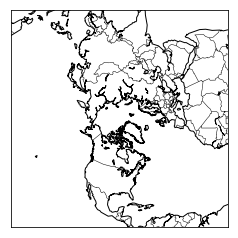

In [24]:
fig,ax=plt.subplots()

# for npstere the bouding lat is the outside of the map
# the lat_0 is what is at 6 o'clock
m = Basemap(projection='npstere',lon_0=270,boundinglat=10,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()

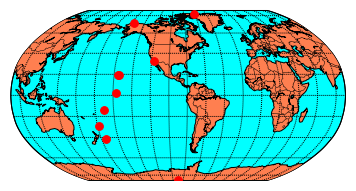

In [11]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

In [41]:
for index,row in df.iterrows():
    print row.Longitude

-62.3
-156.6
-117.3
-155.6
-154.8
-157.3
-170.6
-177.9
-174.9
-90.0


In [43]:
for index,row in df.iterrows():
    print row.Latitude,row.Longitude,row.StationName

82.3 -62.3 Alert, NWT, Canada
71.3 -156.6 Point Barrow, Alaska
32.9 -117.3 La Jolla Pier, California
19.5 -155.6 Mauna Loa Observatory, Hawaii
19.5 -154.8 Cape Kumukahi, Hawaii
2.0 -157.3 Christmas Island
-14.2 -170.6 American Samoa
-29.2 -177.9 Kermadec Island
-41.4 -174.9 Baring Head, New Zealand
-90.0 -90.0 South Pole


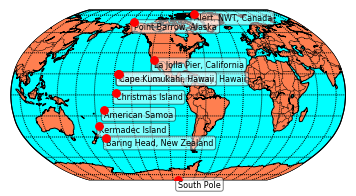

In [39]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
for index,row in df.iterrows():
    tx,ty=m(row.Longitude,row.Latitude)
    textstr=row.StationName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='top',bbox=props)

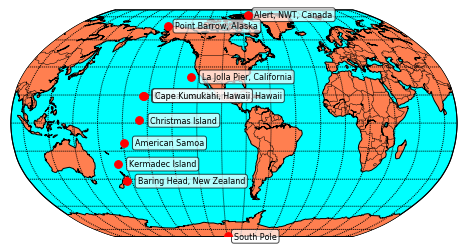

In [40]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,10)
m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values-9.0,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.7)
for index,row in df.iterrows():
    tx,ty=m(row.Longitude,row.Latitude)
    textstr=row.StationName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='center',horizontalalignment='left',bbox=props)

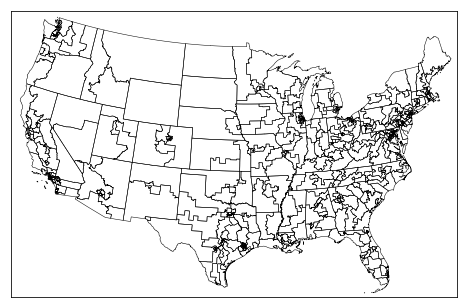

In [68]:
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('cb_2016_us_cd115_5m/cb_2016_us_cd115_5m','District',drawbounds=True)

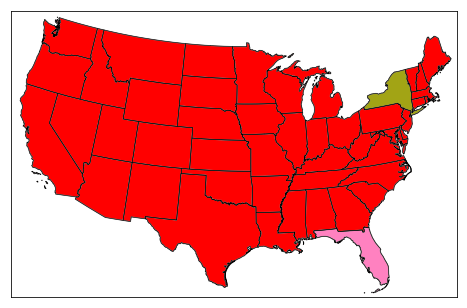

In [96]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','dummy',drawbounds=True)

for count,shape_dict in enumerate(m.dummy_info):
    # print shape_dict['NAME']
    if shape_dict['NAME']=='New York':
        color='xkcd:vomit'
    elif shape_dict['NAME']=='Florida':
        color='xkcd:pink'
    else:
        color='red'
    seg = m.dummy[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

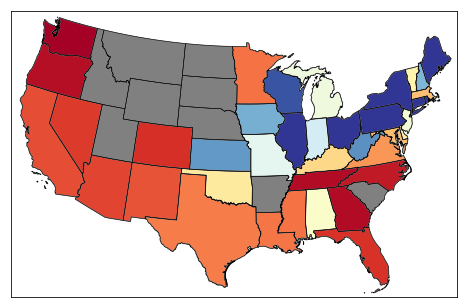

In [205]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
cmap=plt.cm.RdYlBu

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
        color=rgb2hex(cmap(dfBL.PbScaled[dfBL.State==shape_dict['NAME']].item()))
    else:
        color='gray'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

(0.0, 4777416.5450362042, 0.0, 3067664.0158503051)

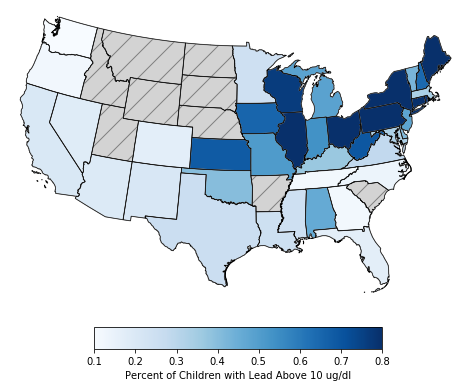

In [210]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
cmap=plt.cm.Blues

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
        color=rgb2hex(cmap(dfBL.PbScaled[dfBL.State==shape_dict['NAME']].item()))
        hatch=''
    else:
        color='lightgray'
        hatch='/'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray',hatch=hatch)
    ax.add_patch(poly)

cbar_title='Percent of Children with Lead Above 10 ug/dl'
norm = Normalize(vmin=vmin, vmax=vmax)
cax = fig.add_axes([0.27, 0.05, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel(cbar_title)   
ax.axis('off')

In [274]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=6,tiles='Mapbox Bright')
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

In [290]:
df=pd.read_excel('BrooklynPublicLead.xlsx')
mapName='brooklynLocations.html'
location =[40.72,-73.95]
m = folium.Map(location=location,zoom_start=13)

for index,row in df.iterrows():
    if row.Pb<150:
        color='green'
    elif row.Pb<400:
        color='yellow'
    elif row.Pb<1200:
        color='orange'
    elif row.Pb>=1200:
        color='red'
    else:
        color='gray'
    popuptext='{} with a lead of {:.2f}'.format(row.descrip_other,row.Pb)
    location =[row.Latitude,row.Longitude]
    folium.CircleMarker(location,radius=30,color=color,fill_color=color,popup=popuptext).add_to(m)

m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

In [291]:
state_geo = r'zips/county.geojson'

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_path=state_geo
)


m.save(outfile='states.html')
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
IFrame('states.html', width=700, height=350)

In [59]:
from IPython.display import IFrame

#Create a map:
schoolMap = folium.Map(location=[40.75, -74.125])

#Create a layer, shaded by test scores:
schoolMap.choropleth(geo_path="schoolDistricts.json",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

#Output the map to an .html file:
schoolMap.save(outfile='testScores.html')
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
IFrame('testScores.html', width=700, height=350)

In [60]:
state_geo = r'zips/Children under 6 years with elevated blood lead levels by NTA/Children under 6 years with elevated blood lead levels by NTA.json'
out_geo = 'lead.html'


m = folium.Map(location=[40.75, -74.125])


folium.GeoJson(
    state_geo,
    style_function=lambda feature: {
        'fillColor':feature['properties']['DATA_VALUE'],
        'color' : feature['properties']['DATA_VALUE'],
    }
).add_to(m)

m.save(outfile=out_geo)
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
IFrame(out_geo, width=700, height=350)

In [293]:
import json

with open(state_geo) as f:
    data = json.load(f)
df_Lead=pd.DataFrame(columns=[['GEONAME','Lead']])
for feature in data['features']:
    #print feature['properties']
    df_Lead=df_Lead.append({'GEONAME':feature['properties']['GEONAME'],
                           'Lead':feature['properties']['DATA_VALUE']},ignore_index=True)
    #df_Lead=df_Lead.append({'Lead':feature['properties']['DATA_VALUE']},ignore_index=True)
    #{'A'}: i}
    #print feature['geometry']['type']
    #print feature['geometry']['coordinates']

In [294]:
state_geo = r'zips/Children under 6 years with elevated blood lead levels by NTA/Children under 6 years with elevated blood lead levels by NTA.json'
out_geo = 'BloodLeadNTA.html'


m = folium.Map(location=[40.75, -74.125])

m.choropleth(
    geo_path=state_geo,
    data=df_Lead,
    columns=['GEONAME','Lead'],
    #threshold_scale = [5,10,25,50,100],
    key_on='feature.properties.GEONAME',
    fill_color='RdBu'
)
'''    geo_data=us_states,
    data=unemployment,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn','''

m.save(outfile=out_geo)
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
IFrame(out_geo, width=500, height=700)

/Users/bmaillou/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.
  del sys.path[0]


It is all there but the column names don't look so great.  

## Do as a GEO JSON

In [73]:
#state_geo = r'zips/Children under 6 years with elevated blood lead levels by NTA/Children under 6 years with elevated blood lead levels by NTA.json'

json_data=r'pyshp-demo.json'
out_geo = 'lead.html'


m = folium.Map(location=[40.75, -74.125],zoom_start=3)

folium.GeoJson(json_data).add_to(m)

'''    geo_data=us_states,
    data=unemployment,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn','''

m.save(outfile=out_geo)
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
IFrame(out_geo, width=700, height=350)




So lets give it better column names.

In [72]:
import shapefile
# read the shapefile
reader = shapefile.Reader("zips/state/cb_2016_us_state_5m.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
   atr = dict(zip(field_names, sr.record))
   geom = sr.shape.__geo_interface__
   buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr)) 

# write the GeoJSON file
from json import dumps
geojson = open("pyshp-demo.json", "w")
geojson.write(dumps({"type": "FeatureCollection",\
"features": buffer}, indent=2) + "\n")
geojson.close()

In [87]:
state_geo = r'pyshp-demo.json'



m = folium.Map(location=[48, -102], zoom_start=3)

folium.GeoJson(state_geo).add_to(m)
#gj.add_child(folium.Popup('try1'))

m.save(outfile='states.html')
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
IFrame('states.html', width=700, height=350)

Popups
http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Popups.ipynb


Now that is a nice dataset!!!!!  

BUT

You all made my life miserable.  Look at how you entered your latitude  and longitude.  We need to deal with them and I had no idea how to do this when I started making this notebook.  But this is real life. 

We could go through manually and fix them.  But imagine you had 1000 points or even more. You couldn't do it manually.  so we need to automate it.  

So I think using regular expressions is the way to go.  It allows us to match expressions.  So here we go! http://pythex.org/

Regular expressions are commonly used in unix and other scripting languages to match strings.  this way you can search through strings and look for things.  

First we are going to use Match or search.  If we import re then we can do re.match or re.search.  

There is a big difference.  

Match only checks the beginnging of the string.

Search checks the whole string.  

We are going to want to pull apart the letters and the numbers.

Regular expressions are used throughout programming to do matches.  I barely know them at all so we will stumble together.  

Lets start by doing a few searches.  Using a few websites and trying to match things.  Match does not return the match.  It returns a match object that then has its own functions!  


First lets set up our text string 

text='Looking for a match 43'

then pattern is what we are going to match and we use the compile function to make python happier but it is not needed

pattern = re.compile(r"o")

Then we are going to do an if statement to see if there is a match.  

We are using search to search the whole string


In [23]:
import re

In [24]:
text='Looking for a match 43'
pattern=re.compile(r"o")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

o


If we want to search for other o's together we would add a + after the o

In [25]:
text='Looking for a match 43'
pattern=re.compile(r"o+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

oo


WE could also look for an m

In [26]:
text='Looking for a match 43'
pattern=re.compile(r"m")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

m


Adding a + after the m does nothing as there is no other m.  

In [27]:
text='Looking for a match 43'
pattern=re.compile(r"m+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

m


But if we used the periods it would match anything after the m.

In [28]:
text='Looking for a match 43'
pattern=re.compile(r"m.")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

ma


six periods....

In [29]:
text='Looking for a match 43'
pattern=re.compile(r"m......")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

match 4


But we could use special characters and get the work.  \w gives us any letter

In [30]:
text='Looking for a match 43'
pattern=re.compile(r"m\w")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

ma


A + at the end will now give us the whole word. 

In [31]:
text='Looking for a match 43'
pattern=re.compile(r"m\w+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

match


But lets focus on what we want.  We want the number.  So lets use the \d special character to just pull out the number

In [32]:
text='Looking for a match 43'
pattern=re.compile(r"\d")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4


But we want all the numbers.  So lets try a + and make the number longer. 

In [33]:
text='Looking for a match 4345'
pattern=re.compile(r"\d+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345


Does it work for a decimal number?

In [34]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345


crap that is bad.  But we could add a period to look for! 

In [35]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+.")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345.


Now we could get the number after decimal place

In [36]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345.33


Now we could call that lat and use what it returns.  

In [37]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,text)
if match:
    print match.group()
    Lat=match.group()
else:
    print 'no match'

4345.33


But we will have trouble b/c lets look at the type

In [38]:
type(Lat)

str

we really need a float!

In [39]:
Lat=float(match.group())
type(Lat)

float

One last check is what if we don't have a decimal point in our number is it alright?

In [40]:
text='Looking for a match 4345d'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,text)
if match:
    print match.group()
    Lat=float(match.group())
    print type(Lat)
else:
    print 'no match'

4345
<type 'float'>


Also there is a bit of an inconsistency here.  We will see it in a minute. 

Unfortanately we can't extract straight for a pandas dataframe

In [41]:
text='Looking for a match 4345d'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,data.LongSB)

TypeError: expected string or buffer

crap so that doesn't work!  We need to figure this out.  So I look up pandas and working with text.  http://pandas-docs.github.io/pandas-docs-travis/text.html

It uses regular expressions and we want to extract. To extract you have to put into parantheses.  

In [42]:
pattern=r"(\d+.\d+)"
data.LongSB.str.extract(pattern)

0        126.9667
1     123.1939532
2           28'37
3             106
4        114.1747
5             NaN
6      100.521157
7       36.900409
8             NaN
9           14.06
10           70.4
11            NaN
12        74.0059
13          35.98
14          97.75
15        69.6381
16        72.0231
17        12.7725
18           12.5
Name: LongSB, dtype: object

But we got an nan.  so we messed up somehow.  

So lets go to http://pythex.org/  and try our regular expression.    Put in your pattern and your string and see if it works.  We learn it doesn't work when there is no decimal place.  So I scratched my head.  what you need is a ? to bring together the two expressions and work when a part is missing.  

In [43]:
pattern=r"(\d+.?\d+)"
data.LongSB.str.extract(pattern)

0        126.9667
1     123.1939532
2              75
3             106
4        114.1747
5              36
6      100.521157
7       36.900409
8             NaN
9           14.06
10           70.4
11            NaN
12        74.0059
13          35.98
14          97.75
15        69.6381
16        72.0231
17        12.7725
18           12.5
Name: LongSB, dtype: object

Now we are doing better! BUT we we lost the negative signs!!!!  So I am still confused. So I looked up another cheat sheet.
http://stackoverflow.com/questions/15814592/how-do-i-include-negative-decimal-numbers-in-this-regular-expression  And this is what we need.
^-?\d*\.{0,1}\d+$ But we drop the \$ sign in case it ends with a letter!

So I gave up a little and used this one.  We could sit and play on pythex all day. It is sort of addictive but I want to get to a map.



In [45]:
pattern=r"(^-?\d*\.{0,1}\d+)"
data.LongSB.str.extract(pattern)

0         126.9667
1     -123.1939532
2              NaN
3              106
4         114.1747
5               36
6       100.521157
7        36.900409
8              NaN
9            14.06
10            70.4
11             NaN
12         74.0059
13           35.98
14           97.75
15         69.6381
16         72.0231
17         12.7725
18            12.5
Name: LongSB, dtype: object

Now we need to pullt out the W or S so we can multiply by -1.  The () mean extract.  the [] means anything in the []

In [46]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1}
print data.LongSB.str.extract(dpattern)

0     NaN
1     NaN
2       W
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10      W
11    NaN
12      W
13    NaN
14      W
15      W
16      W
17    NaN
18    NaN
Name: LongSB, dtype: object


Much easier now.  But this won't work to get the -1 from the dictionary.  So that is bad.  

In [47]:
direction[data.LongSB.str.extract(dpattern)]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

But we can use the map function! this maps a functions into pandas and saves us!

In [48]:
data.LongSB.str.extract(dpattern).map(direction)


0    NaN
1    NaN
2     -1
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10    -1
11   NaN
12    -1
13   NaN
14    -1
15    -1
16    -1
17   NaN
18   NaN
Name: LongSB, dtype: float64

Now we can pull out the number and pull out the Important letters so we could multiply. Lets try putting it together.  

In [49]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1}
pattern=r"(^-?\d*\.{0,1}\d+)"

print data.LongSB.str.extract(pattern)*data.LongSB.str.extract(dpattern).map(direction)

TypeError: can't multiply sequence by non-int of type 'float'

So we need it to be type float.  http://stackoverflow.com/questions/16643695/pandas-convert-strings-to-float-for-multiple-columns-in-dataframe

In [50]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1}
pattern=r"(^-?\d*\.{0,1}\d+)"

print data.LongSB.str.extract(pattern).astype('float')*data.LongSB.str.extract(dpattern).map(direction).astype('float')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10   -70.4000
11        NaN
12   -74.0059
13        NaN
14   -97.7500
15   -69.6381
16   -72.0231
17        NaN
18        NaN
Name: LongSB, dtype: float64


But we lost a whole bunch of numbers.  This took me all day to figure out......  We could fill the missing values with any text we want.  I chose the string '1'.  Then we can convert that in our dictionary to 1 and we are set.  

In [51]:
data.LongSB.str.extract(dpattern).fillna('1')

0     1
1     1
2     W
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    W
11    1
12    W
13    1
14    W
15    W
16    W
17    1
18    1
Name: LongSB, dtype: object

In [53]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1,'1':1}
pattern=r"(^-?\d*\.{0,1}\d+)"

print data.LongSB.str.extract(pattern).astype('float')*data.LongSB.str.extract(dpattern).fillna('1').map(direction).astype('float')

0     126.966700
1    -123.193953
2            NaN
3     106.000000
4     114.174700
5      36.000000
6     100.521157
7      36.900409
8            NaN
9      14.060000
10    -70.400000
11           NaN
12    -74.005900
13     35.980000
14    -97.750000
15    -69.638100
16    -72.023100
17     12.772500
18     12.500000
Name: LongSB, dtype: float64


Now we have one column converted and we have three more!  Lets try and actually convert it.  

In [54]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1,'1':1}
pattern=r"(^-?\d*\.{0,1}\d+)"

data.LongSB=data.LongSB.str.extract(pattern).astype('float')*data.LongSB.str.extract(dpattern).fillna('1').map(direction).astype('float')

print data.LongSB

0     126.966700
1    -123.193953
2            NaN
3     106.000000
4     114.174700
5      36.000000
6     100.521157
7      36.900409
8            NaN
9      14.060000
10    -70.400000
11           NaN
12    -74.005900
13     35.980000
14    -97.750000
15    -69.638100
16    -72.023100
17     12.772500
18     12.500000
Name: LongSB, dtype: float64


You can only run it once!   then it becomes NaN


In [56]:
r=requests.get('https://docs.google.com/spreadsheets/d/1_dgFP4Hlwev5ngdHGcFIsckqSSeb5JF4_PO7BbTc65c/export?format=csv&id')
datatemp=r.content
data=pd.read_csv(StringIO(datatemp))
data.columns=['Time','Home','LatHome','LongHome','SB','LatSB','LongSB','TimeSB']
dpattern=r"([WS])"
direction={'W':-1,'S':-1,'1':1}
pattern=r"(^-?\d*\.{0,1}\d+)"

convert=['LatHome','LongHome','LatSB','LongSB']

for c in convert:
    #print data[c]
    data[c]=data[c].str.extract(pattern).astype('float')*data[c].str.extract(dpattern).fillna('1').map(direction).astype('float')

print data


                   Time                  Home    LatHome    LongHome  \
0   10/26/2015 10:31:21             San Diego  32.715000 -117.162500   
1   10/26/2015 10:34:32        Guilderland NY  42.746580  -73.955351   
2   10/26/2015 10:40:39            Hamden, CT  41.000000  -72.000000   
3   10/26/2015 11:12:39             Singapore   1.000000  103.000000   
4   10/26/2015 16:36:10  Westlake Village, CA  34.141900 -118.819400   
5   10/27/2015 14:00:51     Sugar Land, Texas  29.000000  -95.000000   
6    10/28/2015 8:32:03                 Seoul  37.518798  127.046877   
7   10/28/2015 10:09:47              New York  40.781794  -73.977378   
8   10/28/2015 10:31:25                 Plano  33.019700   33.019700   
9   10/28/2015 10:39:09         Greenwich, CT  41.020000  -73.600000   
10  10/28/2015 10:46:57               Hewlett  40.800000  -73.300000   
11  10/28/2015 10:47:37     Silver Spring, MD  39.000000  -77.000000   
12  10/28/2015 11:08:54         New York City  40.712700  -74.00

### Now we can map!!!!!!   

The beauty and trouble with python is all the modules that exist.  Some are great and some are not.  So you can spend time going down a wrong path to learn the module you are using is not the perfect one.  For mapping I came across two modules.

Basemap  http://matplotlib.org/basemap/ 

Cartopy  http://scitools.org.uk/cartopy/

Neither are perfect.  i used to use basemap and this week started using cartopy and really liked it.  So we are going to map with that.  What I want to do is make a map of peoples homes and where people went for spring break and then connect them via the great circle route.  They are both very similar and I may change my mind again.


To start we will turn on cartopy and add a map.  And we are going to use the stock earth image.  CArtopy is built on matplotlib so this should look very familiar.  

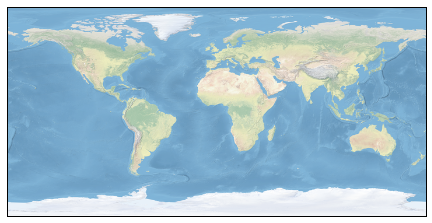

In [59]:
import cartopy.crs as ccrs
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

This should look familer to what we are doing. The only thing we did differnt was choose a projection and add an image to the projection.  You can also add countries and coastlines and other things.  this is the list of projections. http://scitools.org.uk/cartopy/docs/latest/crs/projections.html  Try one!


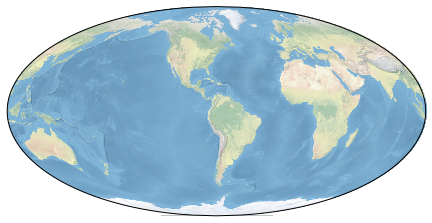

In [60]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-73)) #I centered it on new york!!!
ax.stock_img()

I am now going to use lines for countries etc...  We will see this again later but alpha is a transparency

C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\numpy\lib\shape_base.py:431: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)
C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


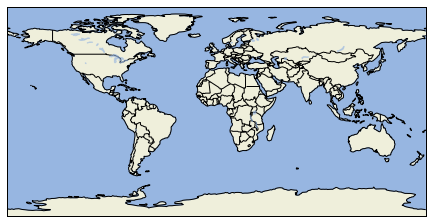

In [61]:
import cartopy.feature

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)


You could put countries over the map.  with coastlines.

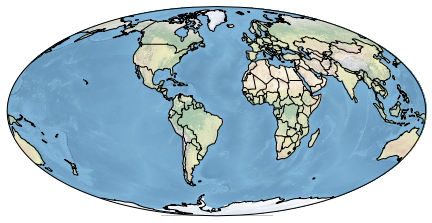

In [62]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-40)) #I centered it on new york!!!
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)

So lets plot our homes on the map.  But first lets talk latitude and longitude. I always get them mixed up....

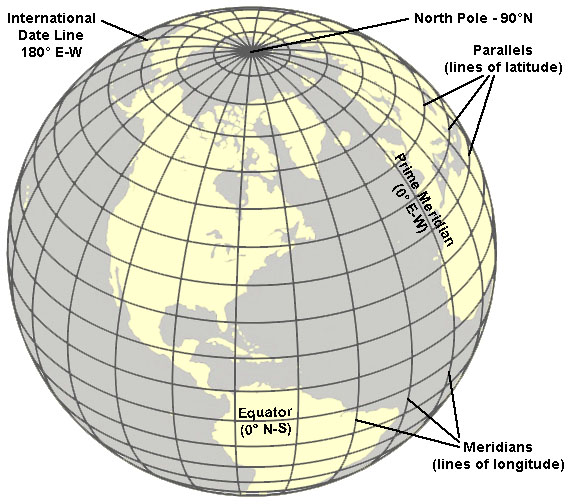

In [63]:
from IPython.display import Image
Image('globe.jpg')

You have longitude and latitude

Parallels = latitudes = North/South.  equator = 0 latitude.  North pole is 90N latitude.  New York City is about 40N.  This is a similar to a Y dimension when plotting

Longitude = Meridians = East/West. Prime Meridian through Greenwich is 0.  We are in the western hemisphere and NYC is about 73W or -73.  This is similar to an x dimension when plotting.  

When ever we talk we talk about latitude and longitude.  But when we plot in computer programs we flip the order to make it x and y.   

###This flip always confuses me!

Also and this is critical, when we plot in a computer we are taking a globe and putting it on a flat piece of paper.  So the coordinates have to get converted.  So there are many times things need conversion!

###Remember to convert!
You might need to convert coordinates.  This gets me sometimes

So lets add our scatter points!

### See the Transform key word!!!

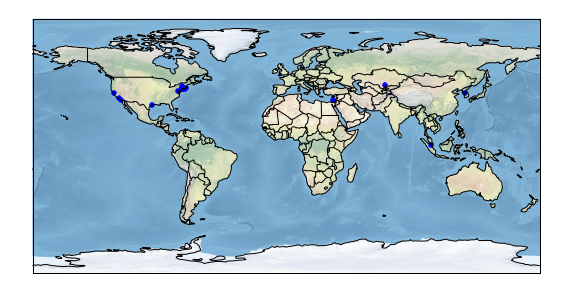

In [64]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
ax = plt.axes(projection=ccrs.PlateCarree()) #I centered it on new york!!!
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())

###Looks Great!
We might have one typo with someone living in Kazakhstan.   But I think I have had student from tehere! Next time I should give more instruction about what are good numbers or we could try and fixing them...   I am going to ignore them.

But Now you can add the trip points in a differnt color! 

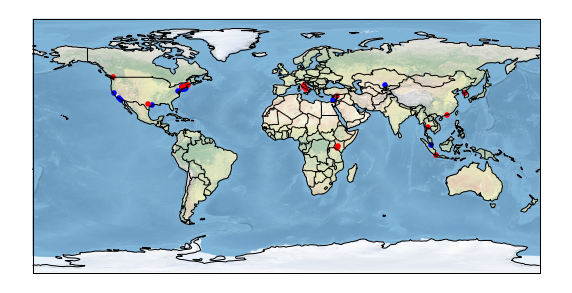

Now I would like to add a line connecting the two points showing where people traveled!  Here is our example. http://scitools.org.uk/cartopy/docs/latest/examples/global_map.html
We need to add an ax.plot and then transform it. 

###Flashback
When matplotlib does plotting it gives a text location.  This can get long and annoying.  Back on the first day of pandas I snuck in a line of code to get rid of the writing. I will do it again now.
ax.get_figure().suptitle("")

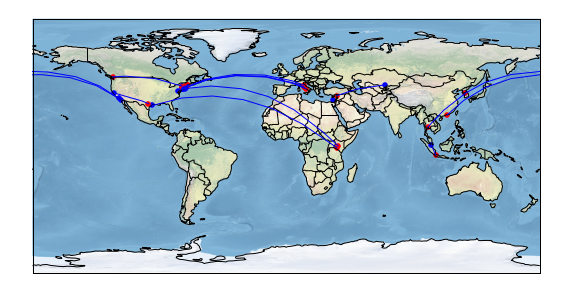

In [67]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())
ax.scatter(data.LongSB,data.LatSB, color='red',  transform=ccrs.PlateCarree())

ax.plot([data.LongHome, data.LongSB], [data.LatHome, data.LatSB], color='blue', transform=ccrs.Geodetic())

ax.get_figure().suptitle("")

Sometimes we want to look at smaller areas.  Next we are going to look at the NYC residents and where they live.  I usually set the coordinates of where we want to look.  People like to use the nomenclature ll=lower left and ur=upper right
so we can set the extent

ll_lat=40

ll_long=-74

ur_lat=43

ur_long=-72

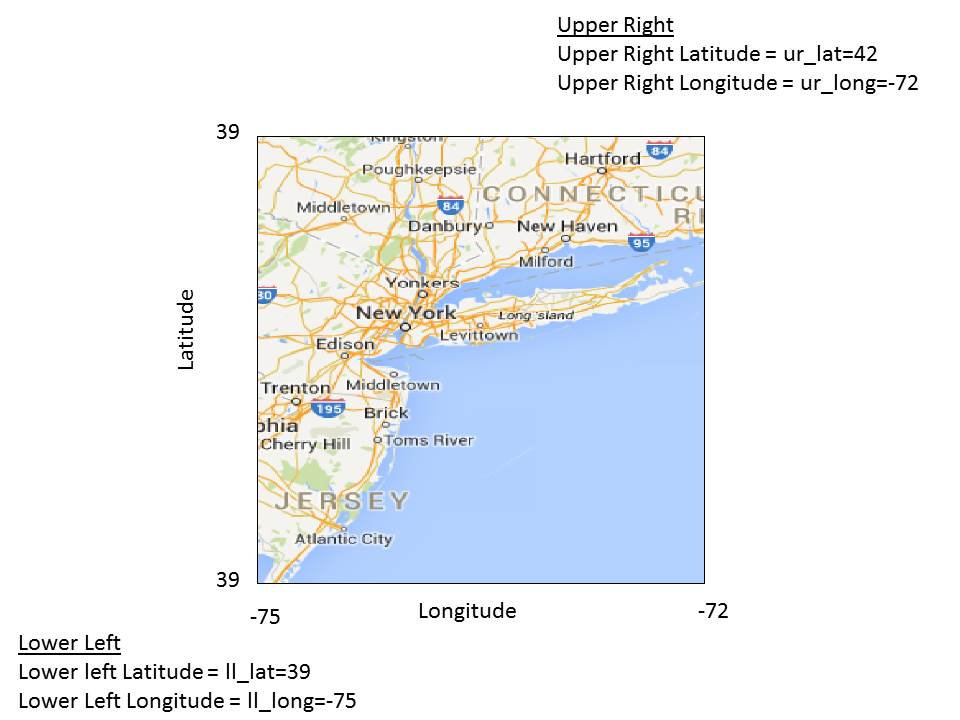

In [72]:
Image('latitude-longitude.jpg',width=600)

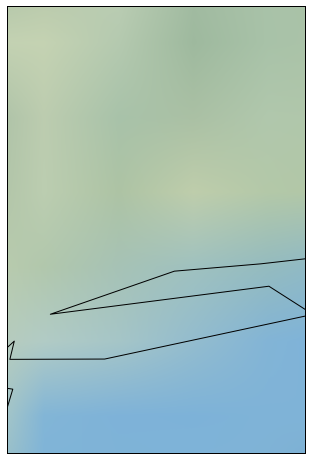

In [73]:
plt.figure(figsize=(8, 8))

ll_lat=40
ll_long=-74
ur_lat=43
ur_long=-72

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)

# Specify a region of interest, in this case, Cardiff.
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2


So when we zoom in that map is useless.  But we can add google maps!!!!!  we use from cartopy.io.img_tiles import GoogleTiles.  Here is the example http://nbviewer.ipython.org/github/ThomasLecocq/geophysique.be/blob/master/2014-02-25%20Shaded%20Relief%20Map%20in%20Python.ipynb


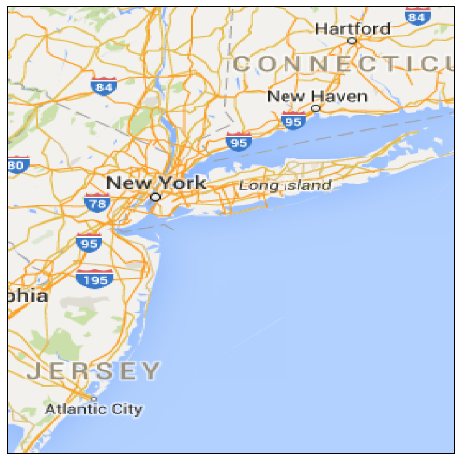

In [74]:
from cartopy.io.img_tiles import GoogleTiles

plt.figure(figsize=(8, 8))

#set the region
ll_lat=39
ll_long=-75
ur_lat=42
ur_long=-72

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest by specifying the extent
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 7,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

Now lets add our scatter points for Spring Break.   

Try changing between streets, terrain, and sattelite.  

### the zoom level is critical!
this is the 7.  If you set it too high you will be downloading data from google all day.  Start small and slowly increase it as you need a nicer map

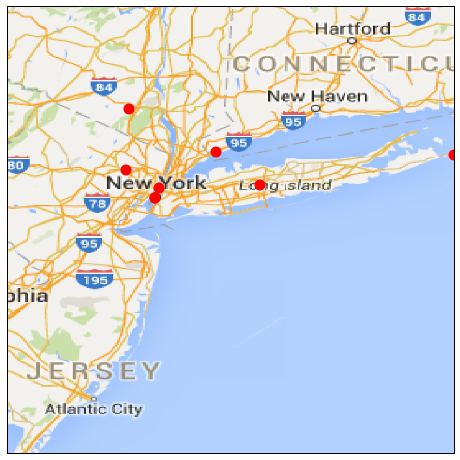

In [76]:
plt.figure(figsize=(8, 8))

ll_lat=39
ll_long=-75
ur_lat=42
ur_long=-72

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 7,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongHome,data.LatHome, color='red', s=100, transform=ccrs.PlateCarree())


Now lets just zoom in on the manhattan points.  

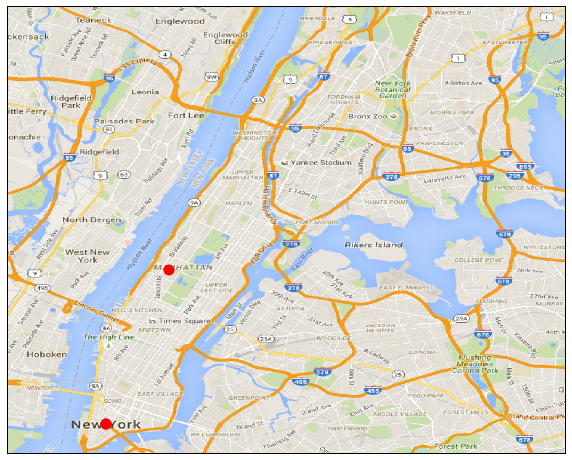

In [77]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongHome,data.LatHome, color='red', s=100, transform=ccrs.PlateCarree())

Now lets add some tags.  It is the same as we did for the linregress just with lat and long.  

http://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot

more than you will ever need to know. 
http://matplotlib.org/users/annotations_guide.html


The one key addition is we need to transform our coordinate system and put that in.  Here is where I learned it.
http://stackoverflow.com/questions/25416600/why-the-annotate-worked-unexpected-here-in-cartopy
You just need the extra transform notation.    

This is not going to work. But this is my first attempt and then we will debug.  

In [87]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongHome,data.LatHome, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

# this should loop over the data and print the name for each one.  
for i in data.index:
    ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)

ValueError: width and height must each be below 32768

Something went wrong and this makes no sense to me.  How do we debug this?  I am not sure.  I am going to start by printing out my for loop to make sure that is working correctly.  

0 San Diego -117.1625 32.715
1 Guilderland NY -73.9553514 42.7465799
2 Hamden, CT -72.0 41.0
3 Singapore 103.0 1.0
4 Westlake Village, CA -118.8194 34.1419
5 Sugar Land, Texas -95.0 29.0
6 Seoul 127.046877 37.518798
7 New York -73.977378 40.781794
8 Plano 33.0197 33.0197
9 Greenwich, CT -73.6 41.02
10 Hewlett -73.3 40.8
11 Silver Spring, MD -77.0 39.0
12 New York City -74.0059 40.7127
13 Portland, Maine 70.26 43.66
14 Berkeley -122.2728 37.8717
15 Dartmouth, MA -70.9697 41.6144
16 Monroe, New York -74.18 41.31
17 NYC -74.0059 40.7127
18 Totowa -74.2 40.9


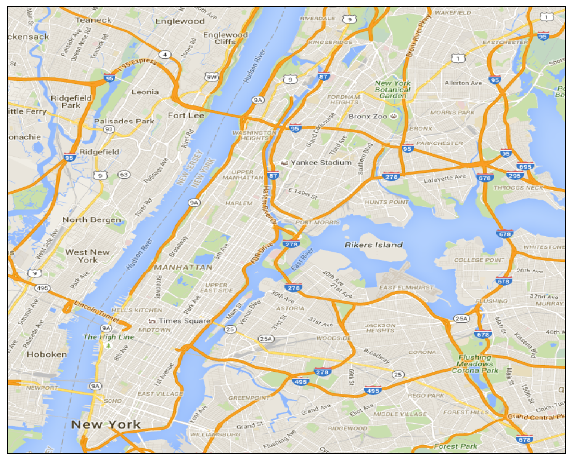

In [85]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

for i in data.index:
    print i,data.loc[i].Home,data.loc[i].LongHome,data.loc[i].LatHome
#    ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
#                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
#                va = 'bottom', bbox = props, xycoords=transform)

That worked perfectly.  So the for loop worked.  My next idea is maybe it doesn't like it when some points aren't on the plot.  So I know point 12 is good. So I am going to stop the for loop and just test point 12.

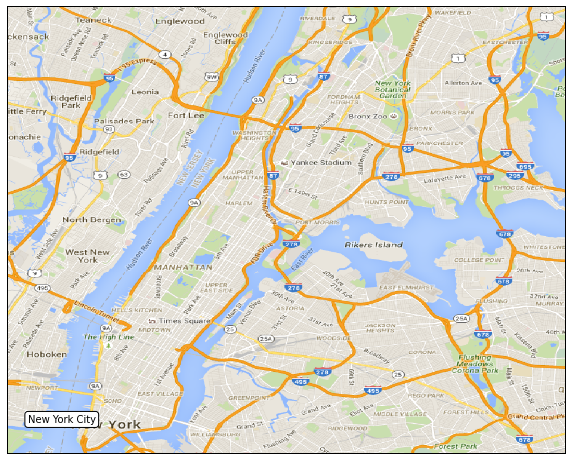

In [86]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

#for i in data.index:
i=12
ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)


That worked great.  So now I think my hunch was corect.  Next what I think I will do it try the whole world with no extent but you have to change the zoom on google maps else we crash.  

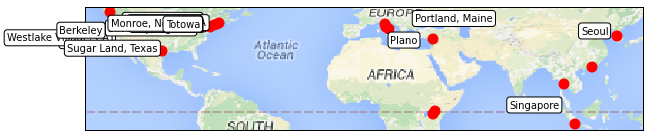

In [88]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
#ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
#              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 1,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

for i in data.index:
    ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)


That was awesome!!!!  Now we know the problem. It crashes if we tries to do a label outside the extent.  So we can just put an if statement in the for loop and just plot the points within the extent.  I am going to break the if statement onto a few lines.  you need to put it into parentheses to do this.  i will also turn the extent back on and the zoom back to 12.  

in if
in if
in if


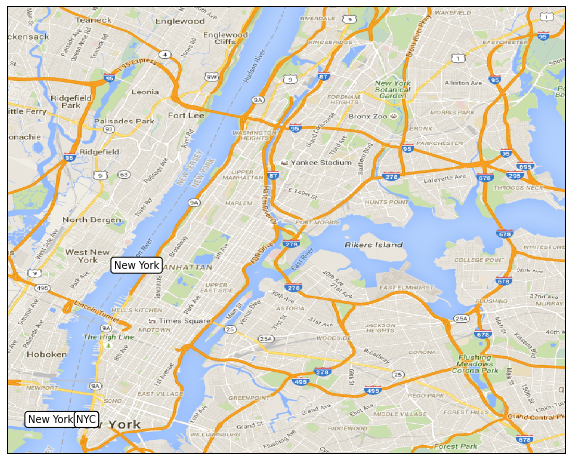

In [91]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

for i in data.index:
        if (data.loc[i].LongHome>ll_long and 
            data.loc[i].LongHome<ur_long and
            data.loc[i].LatHome>ll_lat   and
            data.loc[i].LatHome<ur_lat):
            print 'in if'
            ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)

Fixing overlapping points is brutal. so ignore them.

You are now well on your way to mapping!  I made an extra one below with nicer tick marks.  I am sort of angry at Python right now.  Cartopy makes the nicer and easier map especially with the great circle route but I know basemap does better tick marks.  All we can do is keep moving forward.  It is all nice.  

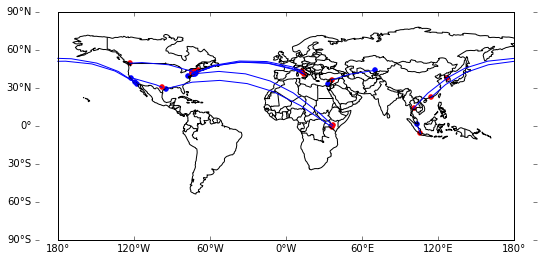

In [94]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
mapProjection='ccrs.PlateCarree()'

plt.figure(figsize=(9, 9))
ax = plt.axes(projection=ccrs.PlateCarree()) 
#ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())
ax.scatter(data.LongSB,data.LatSB, color='red',  transform=ccrs.PlateCarree())

ax.plot([data.LongHome, data.LongSB], [data.LatHome, data.LatSB], color='blue', transform=ccrs.Geodetic())

ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


#Answers

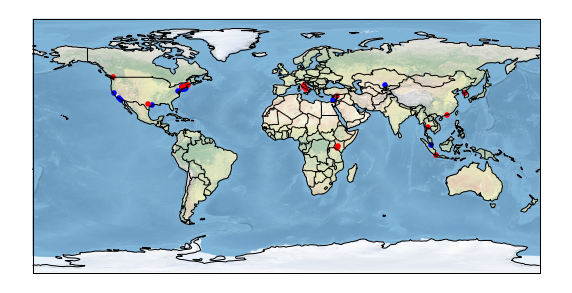

In [66]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())
ax.scatter(data.LongSB,data.LatSB, color='red',  transform=ccrs.PlateCarree())